<a href="https://colab.research.google.com/github/koriatul/pytn-ks-011/blob/main/PYTN_KampusMerdeka_fp1_Koriatul_Qibtiah_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 500>
<h1 align=center><font size = 6,5>Final Project 1</font></h1>


<h2> Group 4 <h2>

- Gilbert Aryaduta Pinem
- Dian Pramesti
- Irfan Musa
- Koriatul Qibtiah

PYTN-KS-011 <br> 
Studi Independen - Kampus Merdeka

# 1. PERKENALAN 

## 1.1 Latar Belakang

Uber dan Lyft adalah perusahaan layanan transportasi berbasis aplikasi yang menawarkan jasa antar jemput penumpang menggunakan mobil pribadi. Kedua perusahaan ini memiliki persaingan yang sangat ketat dalam industri transportasi online. Di Amerika Serikat, Uber dan Lyft merupakan dua pemain utama dalam bisnis ride-hailing (aplikasi penyedia layanan transportasi).

Pada awalnya, Uber didirikan pada tahun 2009 dan menjadi perusahaan ride-hailing pertama yang berhasil mendobrak pasar dengan konsep yang revolusioner. Kemudian, Lyft didirikan pada tahun 2012 sebagai pesaing utama Uber di pasar Amerika Serikat. Kedua perusahaan ini menyediakan layanan yang serupa, yaitu mempertemukan pengemudi dan penumpang menggunakan aplikasi smartphone.

Namun, meskipun memiliki konsep yang serupa, Uber dan Lyft memiliki beberapa perbedaan yang cukup signifikan. Uber memiliki cakupan yang lebih luas dan lebih populer di seluruh dunia. Sedangkan Lyft, memiliki fokus pada pasar domestik Amerika Serikat dan seringkali menawarkan harga yang lebih murah dibandingkan Uber.

Dalam analisis menggunakan konsep regression, kita dapat menggunakan variabel-variabel seperti lokasi, waktu, tarif, jumlah pengemudi dan penumpang, serta penawaran promosi yang ditawarkan oleh kedua perusahaan. Dengan membandingkan data dari kedua perusahaan ini, kita dapat mengetahui faktor-faktor apa saja yang mempengaruhi jumlah pengemudi dan penumpang, dan juga bagaimana faktor-faktor tersebut berdampak pada pendapatan perusahaan. Dengan begitu, kita dapat mengetahui persaingan kedua perusahaan dan juga strategi yang dapat diambil untuk meningkatkan performa bisnis.

## 1.2 Data set

Analisis ini menggunakan data yang bersumber dari kaggle yaitu <a href="https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma" title="Uber vs Lyft">Uber vs Lyft</a>. Dataset Uber & Lyft ini berisi 693071 baris dan 57 kolom yang 10 diantaranya paling relevan. Atribut yang menjadi target yaitu atribut Price/Tarif, sedangkan atribut lainnya merupakan prediktor.

## 1.3 Objektif Yang Ingin Dicapai

Objektif yang ingin dicapai antara lain:

- Untuk mengetahui faktor-faktor yang berpengaruh dalam memprediksi tarif harga Taksi Online.
- Dapat memprediksi tarif harga Taksi Online berdasarkan faktor-faktor yang mempengaruhinya menggunakan metode regresi linier.



# 2. IMPORT PUSTAKA YANG DIBUTUHKAN

## 2.1 Import Pustaka

In [3]:
# for dataframe
import pandas as pd
import numpy as np
import joblib
import sys

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# for data exploration
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler

# for analysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error

# for ignove warning
import warnings
warnings.filterwarnings('ignore')

# 3. DATA LOADING

Dataset yang digunakan adalah rideshare_kaggle.csv.

## 3.1 Proses Data Loading

In [4]:
# Mentransformasikan file yang ada di google drive
! gdown --id 1ShySXqmMrQ8poXlht5V8WB78tILl4G2b

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ShySXqmMrQ8poXlht5V8WB78tILl4G2b
To: /content/rideshare_kaggle.csv
100% 367M/367M [00:02<00:00, 133MB/s]


In [5]:
# Membaca Dataset 
df_ride = pd.read_csv('rideshare_kaggle.csv')
df_ride

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


## 3.2 Eksplorasi Data Sederhana

In [6]:
# Menamapilkan 5 data teratas dengan perintah .head()
df_ride.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [7]:
# Menampilkan 5 data terbawah dengan perintah .tail()
df_ride.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [8]:
# Menampilkan baris dan kolom di dataset dengan perintah .shape()
df_ride.shape

(693071, 57)

Terdapat 693071 baris dan 57 kolom pada dataset.

In [9]:
# Melihat informasi kolom,baris dan type dengan perintah .info()
df_ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Dari informasi diatas terdapat 29 type data float, 17 type data integer, dan 11 type data object.

In [10]:
# Menampilkan kolom-kolom yang ada pada dataset menggunakan perintah .columns
df_ride.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [11]:
# Melihat ringkasan statistik dari data numerik pada dataset dengan perintah .describe()
df_ride.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [12]:
# Mengecek missing value dengan perintah .isnull() serta menjumlahkannya dengan menambah perintah .sum()
df_ride.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Terdapat 55095 nilai yang kosong pada atribut Price. Untuk itu perlu adanya penanganan yang harus dilakukan untuk mengisi missing values.

In [13]:
# Mengecek statistik deskriptif dari masing-masing atribut yang bertipe object menggunakan .describe().
df_ride.describe(include='O')

,id,datetime,timezone,source,destination,cab_type,product_id,name,short_summary,long_summary,icon
count,693071,693071,693071,693071,693071,693071,693071,693071,693071,693071,693071
unique,693071,31350,1,12,12,2,13,13,9,11,7
top,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,2018-11-26 23:21:14,America/New_York,Financial District,Financial District,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,Overcast,Mostly cloudy throughout the day.,cloudy
freq,1,156,693071,58857,58851,385663,55096,55096,218895,202340,218895


In [14]:
# Mendapatkan daftar indeks pada data
df_ride.index.values

array([     0,      1,      2, ..., 693068, 693069, 693070])

In [15]:
# Menghitung nilai unik pada setiap kolom
df_ride.nunique()

id                             693071
timestamp                       36179
hour                               24
day                                17
month                               2
datetime                        31350
timezone                            1
source                             12
destination                        12
cab_type                            2
product_id                         13
name                               13
price                             147
distance                          549
surge_multiplier                    7
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
short_summary                       9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust                          286
windGustTime

# 4. DATA CLEANING

## 4.1 Mempersiapkan Data

Bagian ini berisi proses penyiapan data berupa data cleaning sebelum dilakukan explorasi data lebih lanjut.

In [16]:
# Melihat dataset kembali untuk dilakukan pengecekan atribut duplikasi data.
df_ride

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [17]:
# Pengecekkan data duplikat.
df_ride.duplicated().sum()

0

Tidak ada data yang duplikat.

In [18]:
# Pengecekkan missing values pada atribut price
df_ride['price'].isnull().sum()

55095

Terdapat 55095 baris yang kosong, oleh karena itu perlu penanganan lebih lanjut yaitu mengisi missing values.

In [19]:
# Melihat berapa persen dari nilai yang hilang pada atribut Price.
print(df_ride['price'].isnull().sum()/df_ride.shape[0]* 100 , '%')

7.949402009317949 %


Sebanyak 7,9 %  missing values dari keseluruhan dataset pada atribut Price. Dikarenakan kurang dari 30% lebih baik di drop.

In [20]:
# Melakukan penanganan missing value, yaitu dengan menghapus baris yang merupakan missing value menggunakan .drop
df2 = df_ride.drop(df_ride[df_ride['price'].isnull()].index)

In [21]:
# Setelah itu membandingkan ukuran matriks dataset sebelum dan sesudah dilakukan penanganan missing values.
df_ride.shape , df2.shape

((693071, 57), (637976, 57))

Yang semula dataset ada 693071 baris dan 57 kolom ,didrop menjadi 637976 baris dan 57 kolom.

In [22]:
# melakuan kembali pengecekan missing values untuk memastikan bahwa tidak ada missing value atau missing value sudah ditangani dengan baik.
df2.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [23]:
# Membuat DataFrame baru yang berisi jumlah nilai unik pada kolom 'name' di setiap kelompok data 'product_id'.
df_ride.groupby('product_id')[['name']].nunique()

,name
product_id,
55c66225-fbe7-4fd5-9072-eab1ece5e23e,1
6c84fd89-3f11-4782-9b50-97c468b19529,1
6d318bcc-22a3-4af6-bddd-b409bfce1546,1
6f72dfc5-27f1-42e8-84db-ccc7a75f6969,1
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,1
997acbb5-e102-41e1-b155-9df7de0a73f2,1
9a0e7b09-b92b-4c41-9779-2ad22b4d779d,1
lyft,1
lyft_line,1


Setiap product_id memiliki nilai unik 1.

In [24]:
# Melakukan penghapusan atribut lainya yang memiliki kesamaan dan dapat diwakilkan oleh aribut lainnya.
remove1_cols = ["id", "timestamp", "timezone", "product_id", "latitude", "longitude"]

remove2_cols = ["precipIntensity", "precipProbability", "windGustTime", "temperatureHigh", "temperatureHighTime", "temperatureLow", 
                "temperatureLowTime", "apparentTemperatureHigh", "apparentTemperatureHighTime", "apparentTemperatureLow", 
                "apparentTemperatureLowTime", "icon", "dewPoint", "windBearing", "uvIndex", "visibility.1", "ozone", "sunriseTime", 
                "sunsetTime", "uvIndexTime", "temperatureMin", "temperatureMinTime", "temperatureMax", "temperatureMaxTime", 
                "apparentTemperatureMin", "apparentTemperatureMinTime", "apparentTemperatureMax", "apparentTemperatureMaxTime", 
                "apparentTemperature"]

In [25]:
# Melakukan penghapusan atribut menggunakan .drop
df3 = df2.drop(remove1_cols, axis=1)

df3 = df3.drop(remove2_cols, axis=1)

Menurut kelompok kami kolom tersebut mengandung informasi duplikat atau tidak berguna sehingga di hapus.

In [26]:
# Melihat dataset baru 
df3.head()

,hour,day,month,datetime,source,destination,cab_type,name,price,distance,...,short_summary,long_summary,humidity,windSpeed,windGust,visibility,pressure,cloudCover,moonPhase,precipIntensityMax
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,...,Mostly Cloudy,Rain throughout the day.,0.68,8.66,9.17,10.000,1021.98,0.72,0.30,0.1276
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,...,Rain,"Rain until morning, starting again in the eve...",0.94,11.98,11.98,4.786,1003.97,1.00,0.64,0.1300
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,...,Clear,Light rain in the morning.,0.75,7.33,7.33,10.000,992.28,0.03,0.68,0.1064
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,...,Clear,Partly cloudy throughout the day.,0.73,5.28,5.28,10.000,1013.73,0.00,0.75,0.0000
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,...,Partly Cloudy,Mostly cloudy throughout the day.,0.70,9.14,9.14,10.000,998.36,0.44,0.72,0.0001


In [27]:
# Mengubah nama setiap kolom
df3 = df3.rename(columns={'hour':'Jam', 'day':'Hari','month':'Bulan', 'source':'Asal', 'destination': 'Tujuan','cab_type':'Merek',
                        'name':'Produk','price':'Tarif','distance':'Jarak', 'temperature':'Suhu','humidity':'Kelembapan','short_summary':'Cuaca',
                        'pressure':'Tekanan', 'datetime':'Tanggal','long_summary':'Keterangan', 'surge_multiplier':'Surge_multiplier','windSpeed':'Kecepatan_angin', 'windGust':'Hembusan_angin','cloudCover':'Tutupan_awan', 
                        'visibility':'Visibilitas', 'moonPhase':'Fase_bulan','precipIntensityMax':'Intensitas_maks'})

In [28]:
df3.head(10)

,Jam,Hari,Bulan,Tanggal,Asal,Tujuan,Merek,Produk,Tarif,Jarak,...,Cuaca,Keterangan,Kelembapan,Kecepatan_angin,Hembusan_angin,Visibilitas,Tekanan,Tutupan_awan,Fase_bulan,Intensitas_maks
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,...,Mostly Cloudy,Rain throughout the day.,0.68,8.66,9.17,10.000,1021.98,0.72,0.30,0.1276
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,...,Rain,"Rain until morning, starting again in the eve...",0.94,11.98,11.98,4.786,1003.97,1.00,0.64,0.1300
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,...,Clear,Light rain in the morning.,0.75,7.33,7.33,10.000,992.28,0.03,0.68,0.1064
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,...,Clear,Partly cloudy throughout the day.,0.73,5.28,5.28,10.000,1013.73,0.00,0.75,0.0000
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,...,Partly Cloudy,Mostly cloudy throughout the day.,0.70,9.14,9.14,10.000,998.36,0.44,0.72,0.0001
5,18,17,12,2018-12-17 18:25:12,Haymarket Square,North Station,Lyft,Lux Black,16.5,0.44,...,Overcast,Light rain in the morning and overnight.,0.84,7.19,8.88,8.325,1000.46,1.00,0.33,0.0221
6,5,26,11,2018-11-26 05:03:00,Back Bay,Northeastern University,Lyft,Lyft XL,10.5,1.08,...,Overcast,"Rain until morning, starting again in the eve...",0.91,0.53,0.88,4.675,1014.11,1.00,0.64,0.1245
7,19,2,12,2018-12-02 19:53:04,Back Bay,Northeastern University,Lyft,Lux Black,16.5,1.08,...,Light Rain,Light rain until evening.,0.93,3.38,3.38,3.052,1004.33,1.00,0.86,0.0916
8,6,3,12,2018-12-03 06:28:02,Back Bay,Northeastern University,Lyft,Shared,3.0,1.08,...,Foggy,Foggy in the morning.,0.96,1.25,2.09,1.413,1001.06,1.00,0.89,0.0004
9,10,27,11,2018-11-27 10:45:22,Back Bay,Northeastern University,Lyft,Lux Black XL,27.5,1.08,...,Light Rain,Light rain in the morning.,0.93,6.87,7.42,2.686,989.98,1.00,0.68,0.1425


In [29]:
# Memberi nama baru untuk nilai dalam atribut Produk.
df3.loc[df3['Produk'] == 'Taxi', 'Produk'] = 'Uber Taxi'
df3.loc[df3['Produk'] == 'Shared', 'Produk'] = 'Lyft Shared'
df3.loc[df3['Produk'] == 'Lux', 'Produk'] = 'Lyft Lux'
df3.loc[df3['Produk'] == 'Lyft', 'Produk'] = 'Lyft Regular'
df3.loc[df3['Produk'] == 'Lux Black', 'Produk'] = 'Lyft Lux Black'
df3.loc[df3['Produk'] == 'Lux Black XL', 'Produk'] = 'Lyft Lux Black XL'
df3.loc[df3['Produk'] == 'Black SUV', 'Produk'] = 'Uber Black SUV'
df3.loc[df3['Produk'] == 'WAV', 'Produk'] = 'Uber WAV'
df3.loc[df3['Produk'] == 'Black', 'Produk'] = 'Uber Black'

In [30]:
# Melihat 5 dataset teratas dan terbaru
df3.head()

,Jam,Hari,Bulan,Tanggal,Asal,Tujuan,Merek,Produk,Tarif,Jarak,...,Cuaca,Keterangan,Kelembapan,Kecepatan_angin,Hembusan_angin,Visibilitas,Tekanan,Tutupan_awan,Fase_bulan,Intensitas_maks
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Lyft Shared,5.0,0.44,...,Mostly Cloudy,Rain throughout the day.,0.68,8.66,9.17,10.000,1021.98,0.72,0.30,0.1276
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lyft Lux,11.0,0.44,...,Rain,"Rain until morning, starting again in the eve...",0.94,11.98,11.98,4.786,1003.97,1.00,0.64,0.1300
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft Regular,7.0,0.44,...,Clear,Light rain in the morning.,0.75,7.33,7.33,10.000,992.28,0.03,0.68,0.1064
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lyft Lux Black XL,26.0,0.44,...,Clear,Partly cloudy throughout the day.,0.73,5.28,5.28,10.000,1013.73,0.00,0.75,0.0000
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,...,Partly Cloudy,Mostly cloudy throughout the day.,0.70,9.14,9.14,10.000,998.36,0.44,0.72,0.0001


In [31]:
# Menampilkan banyak nilai dari masing masing atribut
for col in df3.columns:
    print(col,': ')
    print(df3[col].value_counts())
    print("  ")
    print("  ")

Jam : 
0     29872
23    29355
17    28075
12    28017
13    27977
14    27976
16    27972
18    27958
11    27946
10    27918
15    27868
22    27093
9     26673
2     26323
1     26310
4     26125
21    25549
3     25530
19    25410
6     25147
20    24620
5     22995
7     22930
8     22337
Name: Jam, dtype: int64
  
  
Hari : 
27    70135
28    67842
29    55222
1     41680
30    41544
16    41359
17    41354
14    41344
15    41332
3     41323
2     41298
13    35496
18    33329
26    29028
4     11627
10     2534
9      1529
Name: Hari, dtype: int64
  
  
Bulan : 
12    374205
11    263771
Name: Bulan, dtype: int64
  
  
Tanggal : 
2018-11-26 23:33:14    151
2018-11-29 02:29:08    149
2018-11-29 02:47:08    146
2018-11-27 00:03:14    146
2018-11-29 04:38:08    146
                      ... 
2018-12-03 07:33:03      3
2018-11-30 21:33:07      3
2018-12-15 06:05:07      3
2018-12-13 15:10:13      1
2018-11-30 13:17:58      1
Name: Tanggal, Length: 31350, dtype: int64
  
  
Asal : 


In [32]:
# Membuat atribut baru yaitu Tarif permile dengan perhitungan dari Tarif dibagi Jarak
df4 = df3.copy()

df4["Tarif_per_mile"] = df4["Tarif"] / df4["Jarak"]

In [33]:
# Menampilkan 5 baris teratas dari dataset baru
df4.head()

,Jam,Hari,Bulan,Tanggal,Asal,Tujuan,Merek,Produk,Tarif,Jarak,...,Keterangan,Kelembapan,Kecepatan_angin,Hembusan_angin,Visibilitas,Tekanan,Tutupan_awan,Fase_bulan,Intensitas_maks,Tarif_per_mile
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Lyft Shared,5.0,0.44,...,Rain throughout the day.,0.68,8.66,9.17,10.000,1021.98,0.72,0.30,0.1276,11.363636
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lyft Lux,11.0,0.44,...,"Rain until morning, starting again in the eve...",0.94,11.98,11.98,4.786,1003.97,1.00,0.64,0.1300,25.000000
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft Regular,7.0,0.44,...,Light rain in the morning.,0.75,7.33,7.33,10.000,992.28,0.03,0.68,0.1064,15.909091
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lyft Lux Black XL,26.0,0.44,...,Partly cloudy throughout the day.,0.73,5.28,5.28,10.000,1013.73,0.00,0.75,0.0000,59.090909
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,...,Mostly cloudy throughout the day.,0.70,9.14,9.14,10.000,998.36,0.44,0.72,0.0001,20.454545


In [34]:
# Mengganti nilai dalam kolom hari menjadi hari dalam waktu pekan
# Membuat dictionary kategori
kategori = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
for i in range(8, 31):
    kategori[i] = pd.Timestamp(2023, 1, i).strftime('%A')

# Mengganti nilai pada kolom "Hari"
df4['Hari'] = df4['Hari'].replace(kategori)

# Menampilkan DataFrame
print(df4)

        Jam      Hari  Bulan              Tanggal              Asal  \
0         9    Monday     12  2018-12-16 09:30:07  Haymarket Square   
1         2    Friday     11  2018-11-27 02:00:23  Haymarket Square   
2         1  Saturday     11  2018-11-28 01:00:22  Haymarket Square   
3         4    Monday     11  2018-11-30 04:53:02  Haymarket Square   
4         3    Sunday     11  2018-11-29 03:49:20  Haymarket Square   
...     ...       ...    ...                  ...               ...   
693065   23    Monday     12  2018-12-01 23:53:05          West End   
693066   23    Monday     12  2018-12-01 23:53:05          West End   
693067   23    Monday     12  2018-12-01 23:53:05          West End   
693069   23    Monday     12  2018-12-01 23:53:05          West End   
693070   23    Monday     12  2018-12-01 23:53:05          West End   

               Tujuan Merek             Produk  Tarif  Jarak  ...  \
0       North Station  Lyft        Lyft Shared    5.0   0.44  ...   
1       N

In [35]:
df4.head(10)

,Jam,Hari,Bulan,Tanggal,Asal,Tujuan,Merek,Produk,Tarif,Jarak,...,Keterangan,Kelembapan,Kecepatan_angin,Hembusan_angin,Visibilitas,Tekanan,Tutupan_awan,Fase_bulan,Intensitas_maks,Tarif_per_mile
0,9,Monday,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Lyft Shared,5.0,0.44,...,Rain throughout the day.,0.68,8.66,9.17,10.000,1021.98,0.72,0.30,0.1276,11.363636
1,2,Friday,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lyft Lux,11.0,0.44,...,"Rain until morning, starting again in the eve...",0.94,11.98,11.98,4.786,1003.97,1.00,0.64,0.1300,25.000000
2,1,Saturday,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft Regular,7.0,0.44,...,Light rain in the morning.,0.75,7.33,7.33,10.000,992.28,0.03,0.68,0.1064,15.909091
3,4,Monday,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lyft Lux Black XL,26.0,0.44,...,Partly cloudy throughout the day.,0.73,5.28,5.28,10.000,1013.73,0.00,0.75,0.0000,59.090909
4,3,Sunday,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,...,Mostly cloudy throughout the day.,0.70,9.14,9.14,10.000,998.36,0.44,0.72,0.0001,20.454545
5,18,Tuesday,12,2018-12-17 18:25:12,Haymarket Square,North Station,Lyft,Lyft Lux Black,16.5,0.44,...,Light rain in the morning and overnight.,0.84,7.19,8.88,8.325,1000.46,1.00,0.33,0.0221,37.500000
6,5,Thursday,11,2018-11-26 05:03:00,Back Bay,Northeastern University,Lyft,Lyft XL,10.5,1.08,...,"Rain until morning, starting again in the eve...",0.91,0.53,0.88,4.675,1014.11,1.00,0.64,0.1245,9.722222
7,19,Tuesday,12,2018-12-02 19:53:04,Back Bay,Northeastern University,Lyft,Lyft Lux Black,16.5,1.08,...,Light rain until evening.,0.93,3.38,3.38,3.052,1004.33,1.00,0.86,0.0916,15.277778
8,6,Wednesday,12,2018-12-03 06:28:02,Back Bay,Northeastern University,Lyft,Lyft Shared,3.0,1.08,...,Foggy in the morning.,0.96,1.25,2.09,1.413,1001.06,1.00,0.89,0.0004,2.777778
9,10,Friday,11,2018-11-27 10:45:22,Back Bay,Northeastern University,Lyft,Lyft Lux Black XL,27.5,1.08,...,Light rain in the morning.,0.93,6.87,7.42,2.686,989.98,1.00,0.68,0.1425,25.462963


In [36]:
# Mengubah kolom hari
kategori2 = {
    'Monday': 'Senin',
    'Tuesday': 'Selasa',
    'Wednesday': 'Rabu',
    'Thursday': 'Kamis',
    'Friday': 'Jumat',
    'Saturday': 'Sabtu',
    'Sunday': 'Minggu'
}

df4['Hari'] = df4['Hari'].replace(kategori2)

In [37]:
# Menghitung jumlah kemunculan bulan pada kolom 'bulan'
bulan_counts = df4['Bulan'].value_counts()
bulan_counts

12    374205
11    263771
Name: Bulan, dtype: int64

In [38]:
# Mengubah kolom bulan
bulan2 = {
    '11': 'November',
    '12': 'Desember'
}

df4['Bulan'] = df4['Bulan'].replace(bulan2)

In [39]:
# Menghitung jumlah kemunculan asal pada kolom 'Asal'
asal_counts = df4['Asal'].value_counts()
asal_counts

Financial District         54197
Back Bay                   53201
Theatre District           53201
Boston University          53172
North End                  53171
Fenway                     53166
Northeastern University    53164
South Station              53160
Haymarket Square           53147
West End                   52980
Beacon Hill                52841
North Station              52576
Name: Asal, dtype: int64

In [40]:
# Mengubah kolom asal
asal2 = {
    'Financial District':'Distrik Keuangan',
    'Back Bay':'Back Bay',
    'Theatre District':'Distrik Teater',
    'Boston University':'Universitas Boston',
    'North End':'North End',
    'Fenway':'Fenway',
    'Northeastern University':'Universitas Northeastern',
    'South Station':'Stasiun Selatan',
    'Haymarket Square':'Haymarket Square',
    'West End':'West End',
    'Beacon Hill':'Beacon Hill',
    'North Station':'Stasiun Utara'
}

df4['Asal'] = df4['Asal'].replace(asal2)

In [41]:
# Menghitung jumlah kemunculan tujuan pada kolom 'Tujuan'
tujuan_counts = df4['Tujuan'].value_counts()
tujuan_counts

Financial District         54192
Back Bay                   53190
Theatre District           53189
Haymarket Square           53171
Boston University          53171
Fenway                     53166
Northeastern University    53165
North End                  53164
South Station              53159
West End                   52992
Beacon Hill                52840
North Station              52577
Name: Tujuan, dtype: int64

In [42]:
# Mengubah kolom tujuan
tujuan2 = {
    'Financial District':'Distrik Keuangan',
    'Back Bay':'Back Bay',
    'Theatre District':'Distrik Teater',
    'Boston University':'Universitas Boston',
    'North End':'North End',
    'Fenway':'Fenway',
    'Northeastern University':'Universitas Northeastern',
    'South Station':'Stasiun Selatan',
    'Haymarket Square':'Haymarket Square',
    'West End':'West End',
    'Beacon Hill':'Beacon Hill',
    'North Station':'Stasiun Utara'
}

df4['Tujuan'] = df4['Tujuan'].replace(tujuan2)

In [43]:
df4 = df4.rename(columns={'Surge_multiplier': 'Pengganda Kenaikan Tarif'})

In [44]:
# menghitung jumlah kemunculan cuaca pada kolom 'Cuaca'
cuaca_counts = df4['Cuaca'].value_counts()
cuaca_counts

 Overcast             201429
 Mostly Cloudy        134603
 Partly Cloudy        117226
 Clear                 80256
 Light Rain            50488
 Rain                  21781
 Possible Drizzle      17176
 Foggy                  8292
 Drizzle                6725
Name: Cuaca, dtype: int64

In [45]:
# Mengubah kolom cuaca
cuaca3 = {
    'Overcast':'Overcast',
    'Mostly Cloudy':'Sebagian Besar Berawan',
    'Partly Cloudy':'Sebagian Berawan',
    'Clear':'Cerah',   
    'Light Rain':'Hujan Ringan',
    'Rain':'Hujan',
    'Possible Drizzle':'Kemungkinan Gerimis',
    'Foggy':'Berkabut',
    'Drizzle':'Gerimis'              
}

df4['Cuaca'] = df4['Cuaca'].replace(cuaca3)

In [46]:
# Menghitung jumlah kemunculan keterangan pada kolom 'keterangan'
keterangan_counts = df4['Keterangan'].value_counts()
keterangan_counts

 Mostly cloudy throughout the day.                      186262
 Partly cloudy throughout the day.                      133744
 Light rain in the morning.                              94423
 Rain throughout the day.                                49929
 Light rain in the morning and overnight.                46575
 Rain until morning, starting again in the evening.      44071
 Foggy in the morning.                                   41201
 Light rain until evening.                               32690
 Overcast throughout the day.                             6906
 Possible drizzle in the morning.                         1708
 Rain in the morning and afternoon.                        467
Name: Keterangan, dtype: int64

In [47]:
# Mengubah kolom keterangan
ket2 = {
    'Mostly cloudy throughout the day':'Sebagian besar berawan sepanjang hari',
    'Partly cloudy throughout the day':'Sebagian berawan sepanjang hari',
    'Light rain in the morning': 'Hujan ringan di pagi hari',                  
    'Rain throughout the day':  'Hujan sepanjang hari',                       
    'Light rain in the morning and overnight':'Hujan ringan di pagi hari dan tengah malam',              
    'Rain until morning, starting again in the evening':'Hujan hingga pagi, mulai lagi pada malam hari',      
    'Foggy in the morning':  'Berkabut di pagi hari',                                
    'Light rain until evening' :  'Hujan ringan hingga malam hari',                 
    'Overcast throughout the day' :'Mendung sepanjang hari',                          
    'Possible drizzle in the morning': 'Kemungkinan gerimis di pagi hari',              
    'Rain in the morning and afternoon' : 'Hujan pada pagi dan sore hari'               
}

df4['Keterangan'] = df4['Keterangan'].replace(ket2)

In [48]:
df4['Cuaca'].info

<bound method Series.info of 0          Mostly Cloudy 
1                   Rain 
2                  Clear 
3                  Clear 
4          Partly Cloudy 
               ...       
693065     Partly Cloudy 
693066     Partly Cloudy 
693067     Partly Cloudy 
693069     Partly Cloudy 
693070     Partly Cloudy 
Name: Cuaca, Length: 637976, dtype: object>

In [49]:
# Membuat atribut baru dengan menggabungkan atribut Asal dan Tujuan
df4["Rute"] = df4["Asal"] + "-" + df4['Tujuan']
df4["Rute"]

0         Haymarket Square-Stasiun Utara
1         Haymarket Square-Stasiun Utara
2         Haymarket Square-Stasiun Utara
3         Haymarket Square-Stasiun Utara
4         Haymarket Square-Stasiun Utara
                       ...              
693065                West End-North End
693066                West End-North End
693067                West End-North End
693069                West End-North End
693070                West End-North End
Name: Rute, Length: 637976, dtype: object

In [50]:
df4

,Jam,Hari,Bulan,Tanggal,Asal,Tujuan,Merek,Produk,Tarif,Jarak,...,Kelembapan,Kecepatan_angin,Hembusan_angin,Visibilitas,Tekanan,Tutupan_awan,Fase_bulan,Intensitas_maks,Tarif_per_mile,Rute
0,9,Senin,12,2018-12-16 09:30:07,Haymarket Square,Stasiun Utara,Lyft,Lyft Shared,5.0,0.44,...,0.68,8.66,9.17,10.000,1021.98,0.72,0.30,0.1276,11.363636,Haymarket Square-Stasiun Utara
1,2,Jumat,11,2018-11-27 02:00:23,Haymarket Square,Stasiun Utara,Lyft,Lyft Lux,11.0,0.44,...,0.94,11.98,11.98,4.786,1003.97,1.00,0.64,0.1300,25.000000,Haymarket Square-Stasiun Utara
2,1,Sabtu,11,2018-11-28 01:00:22,Haymarket Square,Stasiun Utara,Lyft,Lyft Regular,7.0,0.44,...,0.75,7.33,7.33,10.000,992.28,0.03,0.68,0.1064,15.909091,Haymarket Square-Stasiun Utara
3,4,Senin,11,2018-11-30 04:53:02,Haymarket Square,Stasiun Utara,Lyft,Lyft Lux Black XL,26.0,0.44,...,0.73,5.28,5.28,10.000,1013.73,0.00,0.75,0.0000,59.090909,Haymarket Square-Stasiun Utara
4,3,Minggu,11,2018-11-29 03:49:20,Haymarket Square,Stasiun Utara,Lyft,Lyft XL,9.0,0.44,...,0.70,9.14,9.14,10.000,998.36,0.44,0.72,0.0001,20.454545,Haymarket Square-Stasiun Utara
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,23,Senin,12,2018-12-01 23:53:05,West End,North End,Uber,Uber WAV,9.5,1.00,...,0.74,2.34,2.87,9.785,1023.57,0.31,0.82,0.0000,9.500000,West End-North End
693066,23,Senin,12,2018-12-01 23:53:05,West End,North End,Uber,UberXL,13.0,1.00,...,0.74,2.34,2.87,9.785,1023.57,0.31,0.82,0.0000,13.000000,West End-North End
693067,23,Senin,12,2018-12-01 23:53:05,West End,North End,Uber,UberX,9.5,1.00,...,0.74,2.34,2.87,9.785,1023.57,0.31,0.82,0.0000,9.500000,West End-North End
693069,23,Senin,12,2018-12-01 23:53:05,West End,North End,Uber,Uber Black SUV,27.0,1.00,...,0.74,2.34,2.87,9.785,1023.57,0.31,0.82,0.0000,27.000000,West End-North End


# 5. EKSPLORASI DATA

## 5.1 Eksplorasi Data Lebih Lanjut

In [51]:
df4.describe()

,Jam,Bulan,Tarif,Jarak,Pengganda Kenaikan Tarif,Suhu,Kelembapan,Kecepatan_angin,Hembusan_angin,Visibilitas,Tekanan,Tutupan_awan,Fase_bulan,Intensitas_maks,Tarif_per_mile
count,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000
mean,11.618528,11.586550,16.545125,2.189261,1.015068,39.582406,0.741056,6.186795,8.470616,8.469180,1010.092744,0.686291,0.579076,0.037369,9.687674
std,6.948776,0.492452,9.324359,1.135413,0.095422,6.725500,0.138575,3.147856,5.288683,2.601828,13.475580,0.358599,0.244674,0.055216,13.705589
min,0.000000,11.000000,2.500000,0.020000,1.000000,18.910000,0.380000,0.450000,0.800000,0.717000,988.090000,0.000000,0.090000,0.000000,0.556586
25%,6.000000,11.000000,9.000000,1.270000,1.000000,36.450000,0.640000,3.410000,4.060000,8.432000,999.820000,0.370000,0.300000,0.000000,4.661017
50%,12.000000,12.000000,13.500000,2.160000,1.000000,40.490000,0.710000,5.910000,7.550000,9.880000,1009.250000,0.820000,0.680000,0.000400,7.492326
75%,18.000000,12.000000,22.500000,2.930000,1.000000,43.580000,0.880000,8.410000,11.740000,9.996000,1021.860000,1.000000,0.790000,0.091600,11.538462
max,23.000000,12.000000,97.500000,7.860000,3.000000,57.220000,0.960000,15.000000,27.250000,10.000000,1035.550000,1.000000,0.930000,0.145900,1375.000000


- jarak terjauh yakni 7.86 miles dengan tarif maksimal yakni 97.5 dollar
- suhu rata-rata berada pada 39.58derajat Fahrenheit
- rata-rata pemesanan Taksi Online berada pada jam 11

In [52]:
# Memperoleh deskripsi statistik dari kolom-kolom yang memiliki tipe data objek/string.
df4.describe(include='O')

,Hari,Tanggal,Asal,Tujuan,Merek,Produk,Cuaca,Keterangan,Rute
count,637976,637976,637976,637976,637976,637976,637976,637976,637976
unique,7,31350,12,12,2,12,9,11,72
top,Senin,2018-11-26 23:33:14,Distrik Keuangan,Distrik Keuangan,Uber,UberXL,Overcast,Mostly cloudy throughout the day.,Distrik Keuangan-Stasiun Selatan
freq,126112,151,54197,54192,330568,55096,201429,186262,9534


- Terdapat 12 asal tempat, tujuan, dan produk
- Penumpang memesan paling banyak pada hari senin
- Cuaca yang sering terjadi yaitu overcast
- Rute yang sering dipesan oleh penumpang yaitu distrik keuangan-stasiun selatan dengan produk UberXL

In [53]:
df4['Merek'].value_counts()

Uber    330568
Lyft    307408
Name: Merek, dtype: int64

Jumlah transportasi Uber lebih unggul yaitu sebanyak 330568 sedangkan Lyft 307408.

In [54]:
# Melihat persentase jumlah masing-masing merek
datamerk = pd.DataFrame({"Total":df4['Merek'].value_counts(), 
                          "Presentase":(df4['Merek'].value_counts()/df4.shape[0])*100})
datamerk

,Total,Presentase
Uber,330568,51.815115
Lyft,307408,48.184885


Presentase Uber sebesar 51,8% sedangkan Lyft 48,2%.

## 5.1 PIE CHART

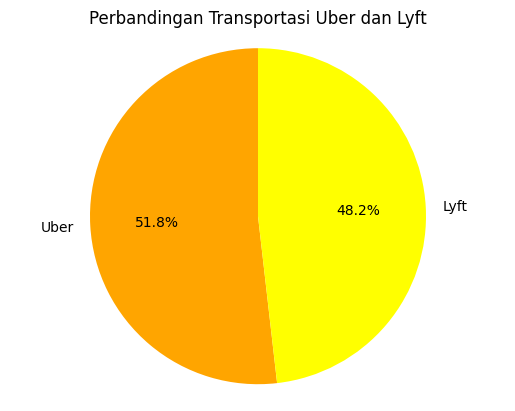

In [55]:
# Visualisasi data dengan pie chart
jumlah = datamerk['Total']
label = ['Uber','Lyft']

# Mengganti warna
warna = ['orange','yellow'] 

# Plot pie chart
plt.pie(jumlah, labels=label, autopct='%1.1f%%', startangle=90, colors=warna)

# Mengatur aspek proporsi pie chart menjadi sama agar terlihat bulat
plt.axis('equal')

# Menambahkan judul
plt.title('Perbandingan Transportasi Uber dan Lyft')

# Menampilkan pie chart
plt.show()


Pada pie chart diatas sebesar 55.8% merupakan merk Uber sedangkan 48.2% merk Lyft. Uber lebih unggul dari pada Lyft.

In [56]:
# Membuat dataframe cuaca
cuaca = df4['Cuaca'].value_counts()
cuaca1 = pd.DataFrame(data=cuaca.index, columns=["cuaca"])
cuaca1['total'] = cuaca.values
cuaca1

,cuaca,total
0,Overcast,201429
1,Mostly Cloudy,134603
2,Partly Cloudy,117226
3,Clear,80256
4,Light Rain,50488
5,Rain,21781
6,Possible Drizzle,17176
7,Foggy,8292
8,Drizzle,6725


In [57]:
cuaca1 = cuaca1.set_index('cuaca')
cuaca1

,total
cuaca,
Overcast,201429
Mostly Cloudy,134603
Partly Cloudy,117226
Clear,80256
Light Rain,50488
Rain,21781
Possible Drizzle,17176
Foggy,8292
Drizzle,6725


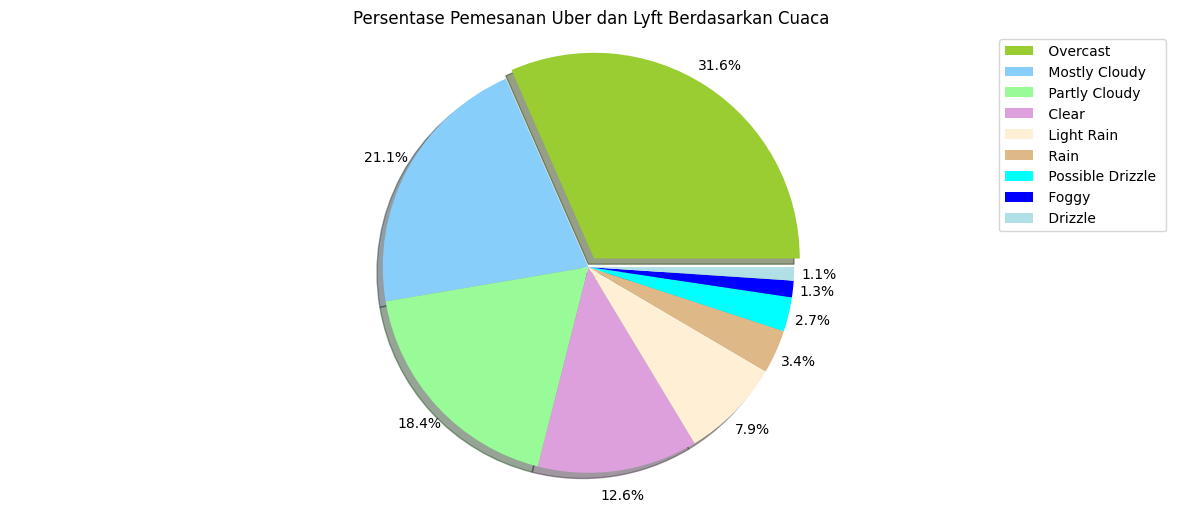

In [58]:
explode_list=[0.05,0,0,0,0,0,0,0,0]
color_list=['yellowgreen','lightskyblue','palegreen','plum','papayawhip','burlywood','cyan','blue','powderblue']
cuaca.plot(kind="pie", figsize=(15,6), shadow=True, autopct="%1.1f%%", labels=None, colors=color_list, explode=explode_list, pctdistance=1.12)
plt.title('Persentase Pemesanan Uber dan Lyft Berdasarkan Cuaca')
plt.ylabel('')
plt.axis('equal')
plt.legend(labels=cuaca1.index, loc='upper right')
plt.show()

Pie chart diatas merupakan persentase pemesanan Uber dan Lyft berdasarkan cuaca, rata rata orang memesan saat overcast.

## 5.2 BAR CHART

In [59]:
# Membuat dataframe merek lyft
lyft = df4[df4['Merek'] == 'Lyft']
lyft

,Jam,Hari,Bulan,Tanggal,Asal,Tujuan,Merek,Produk,Tarif,Jarak,...,Kelembapan,Kecepatan_angin,Hembusan_angin,Visibilitas,Tekanan,Tutupan_awan,Fase_bulan,Intensitas_maks,Tarif_per_mile,Rute
0,9,Senin,12,2018-12-16 09:30:07,Haymarket Square,Stasiun Utara,Lyft,Lyft Shared,5.0,0.44,...,0.68,8.66,9.17,10.000,1021.98,0.72,0.30,0.1276,11.363636,Haymarket Square-Stasiun Utara
1,2,Jumat,11,2018-11-27 02:00:23,Haymarket Square,Stasiun Utara,Lyft,Lyft Lux,11.0,0.44,...,0.94,11.98,11.98,4.786,1003.97,1.00,0.64,0.1300,25.000000,Haymarket Square-Stasiun Utara
2,1,Sabtu,11,2018-11-28 01:00:22,Haymarket Square,Stasiun Utara,Lyft,Lyft Regular,7.0,0.44,...,0.75,7.33,7.33,10.000,992.28,0.03,0.68,0.1064,15.909091,Haymarket Square-Stasiun Utara
3,4,Senin,11,2018-11-30 04:53:02,Haymarket Square,Stasiun Utara,Lyft,Lyft Lux Black XL,26.0,0.44,...,0.73,5.28,5.28,10.000,1013.73,0.00,0.75,0.0000,59.090909,Haymarket Square-Stasiun Utara
4,3,Minggu,11,2018-11-29 03:49:20,Haymarket Square,Stasiun Utara,Lyft,Lyft XL,9.0,0.44,...,0.70,9.14,9.14,10.000,998.36,0.44,0.72,0.0001,20.454545,Haymarket Square-Stasiun Utara
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693042,1,Minggu,11,2018-11-29 01:03:40,Distrik Teater,Fenway,Lyft,Lyft XL,16.5,3.11,...,0.72,8.41,11.54,9.915,996.92,0.77,0.72,0.0000,5.305466,Distrik Teater-Fenway
693043,1,Minggu,11,2018-11-29 01:03:40,Distrik Teater,Fenway,Lyft,Lyft Lux,22.5,3.11,...,0.72,8.41,11.54,9.915,996.92,0.77,0.72,0.0000,7.234727,Distrik Teater-Fenway
693048,1,Minggu,11,2018-11-29 01:47:08,Distrik Teater,Fenway,Lyft,Lyft Shared,7.0,3.11,...,0.72,8.41,11.54,9.915,996.92,0.77,0.72,0.0000,2.250804,Distrik Teater-Fenway
693051,1,Minggu,11,2018-11-29 01:47:08,Distrik Teater,Fenway,Lyft,Lyft Regular,10.5,3.11,...,0.72,8.41,11.54,9.915,996.92,0.77,0.72,0.0000,3.376206,Distrik Teater-Fenway


In [60]:
# Membuat dataframe yang menghitung jumlah perjalanan Lyft yang dilakukan setiap hari
lyft2 = lyft['Hari'].value_counts(sort=True)
lyft3 = pd.DataFrame(data=lyft2.index, columns=["hari"])
lyft3['total'] = lyft2.values
lyft3

,hari,total
0,Senin,60909
1,Sabtu,52942
2,Jumat,50760
3,Minggu,46372
4,Selasa,40742
5,Rabu,35979
6,Kamis,19704


In [61]:
# Mengurutkan hari dari senin hingga sabtu
urutan_hari = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu']
lyft3 = lyft3.set_index('hari').reindex(urutan_hari).reset_index()
lyft3

,hari,total
0,Senin,60909
1,Selasa,40742
2,Rabu,35979
3,Kamis,19704
4,Jumat,50760
5,Sabtu,52942


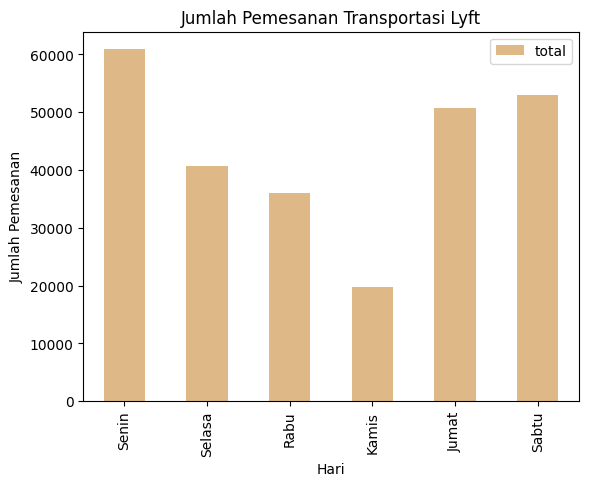

In [62]:
# Membuat bar chart jumlah pemesananan transportasi lyft setiap harinya
lyft3.plot(kind='bar', x='hari', y='total', color='burlywood')
plt.title('Jumlah Pemesanan Transportasi Lyft')
plt.ylabel('Jumlah Pemesanan')
plt.xlabel('Hari')
plt.show()

Pada bar chart diatas diketahui bahwa pengguna memesan transportasi lyft terbanyak pada hari Senin kemungkinan terjadi karena hari Senin adalah hari pertama sehabis akhir minggu, maka orang-orang sering bagun terlambat dan memilih untuk memesan Lyft. Sedangkan paling sedikit adalah hari kamis. Untuk di akhir minggu seperti Jumat dan Sabtu, bar chart menunjukkan angka tinggi yang berarti penggunaan Lyft di akhir pekan mengalami kenaikan dikarenakan kemungkinan kebanyakan orang memilih untuk berekreasi menggunakan transportasi Lyft.

In [63]:
df4

,Jam,Hari,Bulan,Tanggal,Asal,Tujuan,Merek,Produk,Tarif,Jarak,...,Kelembapan,Kecepatan_angin,Hembusan_angin,Visibilitas,Tekanan,Tutupan_awan,Fase_bulan,Intensitas_maks,Tarif_per_mile,Rute
0,9,Senin,12,2018-12-16 09:30:07,Haymarket Square,Stasiun Utara,Lyft,Lyft Shared,5.0,0.44,...,0.68,8.66,9.17,10.000,1021.98,0.72,0.30,0.1276,11.363636,Haymarket Square-Stasiun Utara
1,2,Jumat,11,2018-11-27 02:00:23,Haymarket Square,Stasiun Utara,Lyft,Lyft Lux,11.0,0.44,...,0.94,11.98,11.98,4.786,1003.97,1.00,0.64,0.1300,25.000000,Haymarket Square-Stasiun Utara
2,1,Sabtu,11,2018-11-28 01:00:22,Haymarket Square,Stasiun Utara,Lyft,Lyft Regular,7.0,0.44,...,0.75,7.33,7.33,10.000,992.28,0.03,0.68,0.1064,15.909091,Haymarket Square-Stasiun Utara
3,4,Senin,11,2018-11-30 04:53:02,Haymarket Square,Stasiun Utara,Lyft,Lyft Lux Black XL,26.0,0.44,...,0.73,5.28,5.28,10.000,1013.73,0.00,0.75,0.0000,59.090909,Haymarket Square-Stasiun Utara
4,3,Minggu,11,2018-11-29 03:49:20,Haymarket Square,Stasiun Utara,Lyft,Lyft XL,9.0,0.44,...,0.70,9.14,9.14,10.000,998.36,0.44,0.72,0.0001,20.454545,Haymarket Square-Stasiun Utara
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,23,Senin,12,2018-12-01 23:53:05,West End,North End,Uber,Uber WAV,9.5,1.00,...,0.74,2.34,2.87,9.785,1023.57,0.31,0.82,0.0000,9.500000,West End-North End
693066,23,Senin,12,2018-12-01 23:53:05,West End,North End,Uber,UberXL,13.0,1.00,...,0.74,2.34,2.87,9.785,1023.57,0.31,0.82,0.0000,13.000000,West End-North End
693067,23,Senin,12,2018-12-01 23:53:05,West End,North End,Uber,UberX,9.5,1.00,...,0.74,2.34,2.87,9.785,1023.57,0.31,0.82,0.0000,9.500000,West End-North End
693069,23,Senin,12,2018-12-01 23:53:05,West End,North End,Uber,Uber Black SUV,27.0,1.00,...,0.74,2.34,2.87,9.785,1023.57,0.31,0.82,0.0000,27.000000,West End-North End


In [64]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Jam                       637976 non-null  int64  
 1   Hari                      637976 non-null  object 
 2   Bulan                     637976 non-null  int64  
 3   Tanggal                   637976 non-null  object 
 4   Asal                      637976 non-null  object 
 5   Tujuan                    637976 non-null  object 
 6   Merek                     637976 non-null  object 
 7   Produk                    637976 non-null  object 
 8   Tarif                     637976 non-null  float64
 9   Jarak                     637976 non-null  float64
 10  Pengganda Kenaikan Tarif  637976 non-null  float64
 11  Suhu                      637976 non-null  float64
 12  Cuaca                     637976 non-null  object 
 13  Keterangan                637976 non-null  o

In [65]:
# Membuat dataframe cuaca berdasarkan merek
dflyft1 = pd.DataFrame(df4.groupby(["Merek", "Cuaca"]).size().reset_index(name="Count"))
dflyft2 = pd.DataFrame(dflyft1.groupby(["Cuaca", "Merek"])["Count"].sum().unstack())
dflyft2

Merek,Lyft,Uber
Cuaca,,
Clear,38653,41603
Drizzle,3111,3614
Foggy,4002,4290
Light Rain,24328,26160
Mostly Cloudy,64720,69883
Overcast,97416,104013
Partly Cloudy,56663,60563
Possible Drizzle,8072,9104
Rain,10443,11338


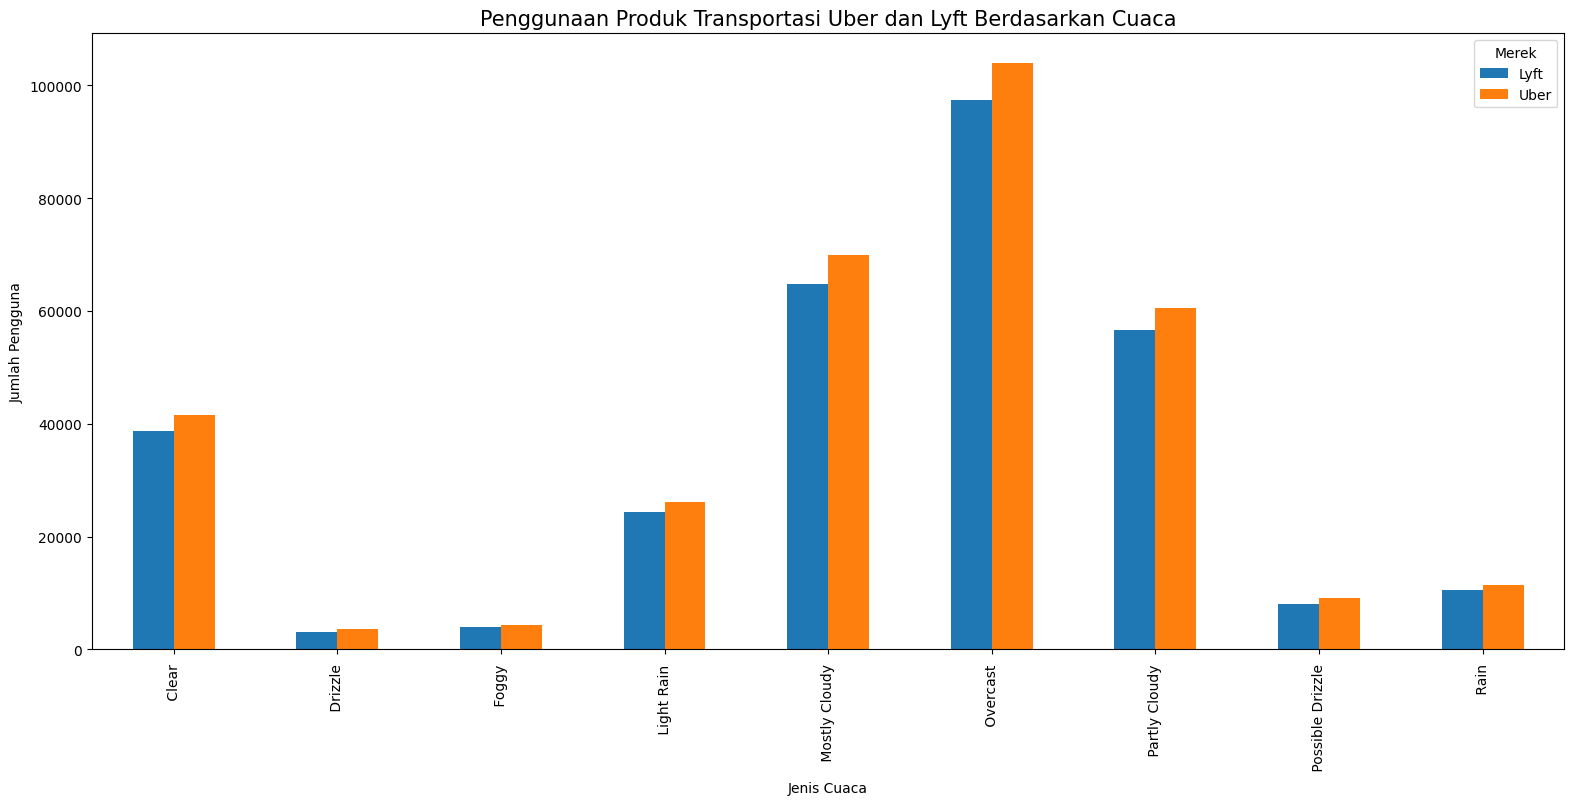

In [66]:
# Bar chart produk transportasi uber dan lyft berdasarkan cuaca
dflyft2.plot(kind="bar", figsize=(19,8))

plt.title("Penggunaan Produk Transportasi Uber dan Lyft Berdasarkan Cuaca", fontsize=15)
plt.ylabel("Jumlah Pengguna")
plt.xlabel("Jenis Cuaca")
plt.show()

Dari bar chart di atas, dapat diketahui penggunaan masing masing merek lyft dan uber saat di cuaca tertentu. Jika dilihat sekilas uber lebih unggul di cuaca manapun.

In [67]:
# membuat dataframe tarif berdasarkan merek
harga = df4[['Merek','Tarif']]

dfharga = harga.reset_index()[["Merek", "Tarif"]].groupby(["Merek"]).mean().sort_values(by="Tarif",ascending=True)
dfharga

,Tarif
Merek,
Uber,15.795343
Lyft,17.351396


Rata rata tarif Uber adalah USD 15.7, sedangkan Lyft USD 17.3

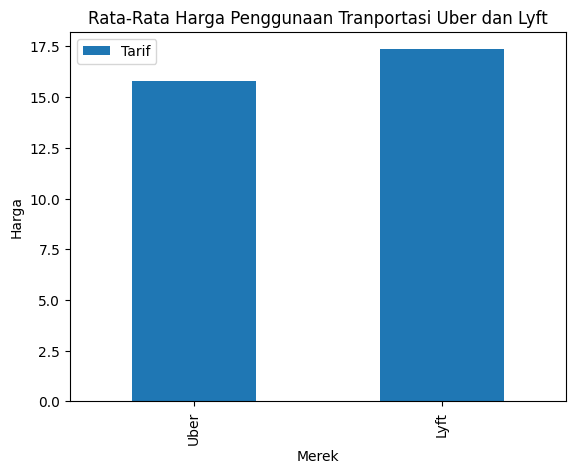

In [68]:
# Membuat bar chart rata rata harga penggunaan transportasi uber dan lyft
dfharga.plot(kind = 'bar')
plt.title("Rata-Rata Harga Penggunaan Tranportasi Uber dan Lyft")
plt.xlabel("Merek")
plt.ylabel("Harga")
plt.show()

Dari bar chart diatas diketahui tarif Lyft lebih mahal dari pada Uber.

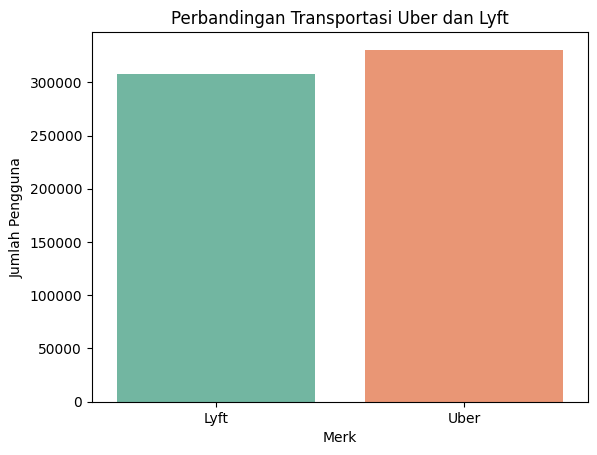

In [69]:
# Membuat bar chart perbandingan transportasi uber dan lyft
sns.countplot(x="Merek", data=df4, palette="Set2")
plt.title('Perbandingan Transportasi Uber dan Lyft')
plt.xlabel('Merk')
plt.ylabel('Jumlah Pengguna')
plt.show()

Dari bar chart diatas diketahui Uber lebih banyak penggunanya dari pada Lyft.

## 5.3 LINE PLOT

In [70]:
# Menghitung rute perjalanan tertinggi berdasarkan tarif
rute = df4.groupby(['Rute'])['Tarif'].sum().sort_values(ascending=False)[:5]
rute

Rute
Distrik Keuangan-Universitas Boston          227956.0
Universitas Boston-Distrik Keuangan          215866.0
Fenway-Distrik Keuangan                      208980.5
Distrik Keuangan-Fenway                      208958.5
Universitas Northeastern-Distrik Keuangan    200393.5
Name: Tarif, dtype: float64

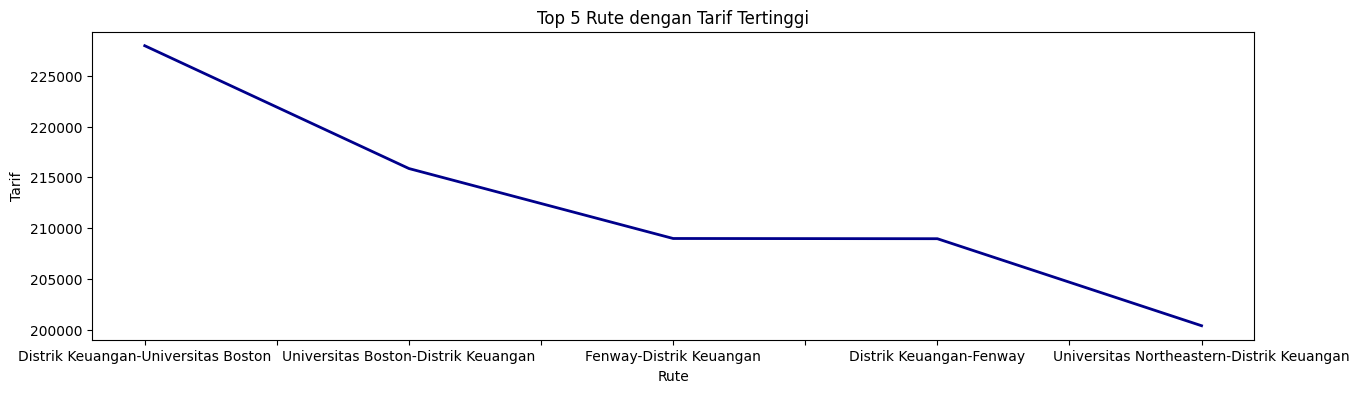

In [71]:
# Membuat line plot dengan data top 5 rute

rute.plot(kind='line',figsize=(15,4), color='darkblue', linewidth=2)

plt.title("Top 5 Rute dengan Tarif Tertinggi")
plt.ylabel('Tarif')
plt.xlabel('Rute')
plt.show()

Top 5 Rute dengan Tarif Tertinggi :
- Distrik Keuangan-Universitas Boston dengan tarif 227956.0
- Universitas Boston-Distrik Keuangan dengan tarif 215866.0
- Fenway-Distrik Keuangan dengan tarif 208980.5
- Distrik Keuangan-Fenway dengan tarif 208958.5
- Universitas Northeastern-Distrik Keuangan dengan tarif 200393.5 

In [72]:
df4['Tujuan'].value_counts()

Distrik Keuangan            54192
Back Bay                    53190
Distrik Teater              53189
Haymarket Square            53171
Universitas Boston          53171
Fenway                      53166
Universitas Northeastern    53165
North End                   53164
Stasiun Selatan             53159
West End                    52992
Beacon Hill                 52840
Stasiun Utara               52577
Name: Tujuan, dtype: int64

Tujuan yang paling sering dikunjungi penumpang adalah Distrik Keuangan.

## 5.4 BOX PLOT

Text(0.5, 1.0, 'Perbandingan Tarif Uber dan Lyft')

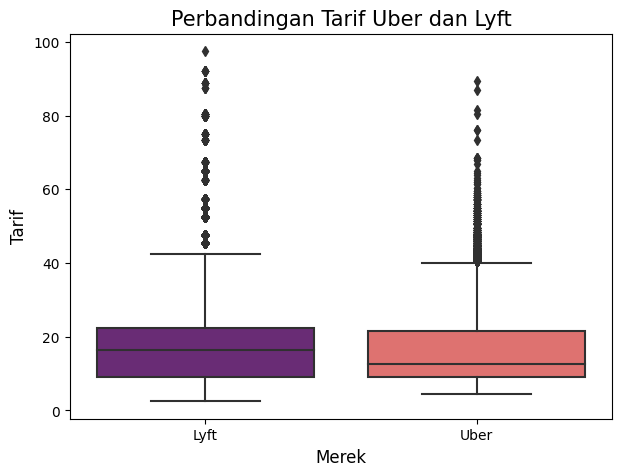

In [73]:
# Membuat box plot perbandingan tarif uber dan lyft
fig, ax = plt.subplots(figsize=(7, 5))

sns.boxplot(x='Merek', y='Tarif', data=df4, palette="magma") #pallate untuk mengatur skema warna

plt.xlabel("Merek", fontsize= 12)
plt.ylabel("Tarif", fontsize= 12)
plt.title("Perbandingan Tarif Uber dan Lyft", fontsize= 15)

Pada box plot diatas baik Lyft maupun Uber memiliki outlier yang cukup banyak.

## 5.5 HISTOGRAM

In [74]:
# Membuat dataframe tarif uber
df_uber_tarif = df4[df4['Merek'] == 'Uber'].groupby('Tarif').size().reset_index(name='Jumlah')
df_uber_tarif

,Tarif,Jumlah
0,4.5,419
1,5.0,70
2,5.5,2260
3,6.0,666
4,6.5,5390
...,...,...
122,76.0,2
123,80.5,1
124,81.5,1
125,87.0,1


Text(0.5, 1.0, 'Histogram Tarif Uber')

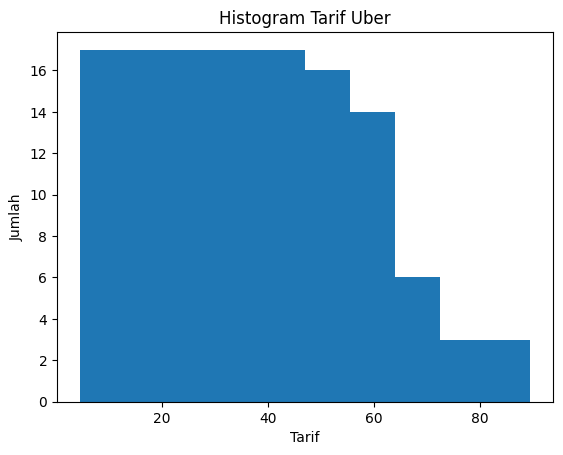

In [75]:
# Membuat histogram tarif uber
plt.hist(df_uber_tarif['Tarif'], bins=10)
plt.xlabel('Tarif')
plt.ylabel('Jumlah')
plt.title('Histogram Tarif Uber')

Histogram diatas merupakan histogram tarif harga uber.

## 5.6 HEATMAP PLOT

In [76]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Jam                       637976 non-null  int64  
 1   Hari                      637976 non-null  object 
 2   Bulan                     637976 non-null  int64  
 3   Tanggal                   637976 non-null  object 
 4   Asal                      637976 non-null  object 
 5   Tujuan                    637976 non-null  object 
 6   Merek                     637976 non-null  object 
 7   Produk                    637976 non-null  object 
 8   Tarif                     637976 non-null  float64
 9   Jarak                     637976 non-null  float64
 10  Pengganda Kenaikan Tarif  637976 non-null  float64
 11  Suhu                      637976 non-null  float64
 12  Cuaca                     637976 non-null  object 
 13  Keterangan                637976 non-null  o

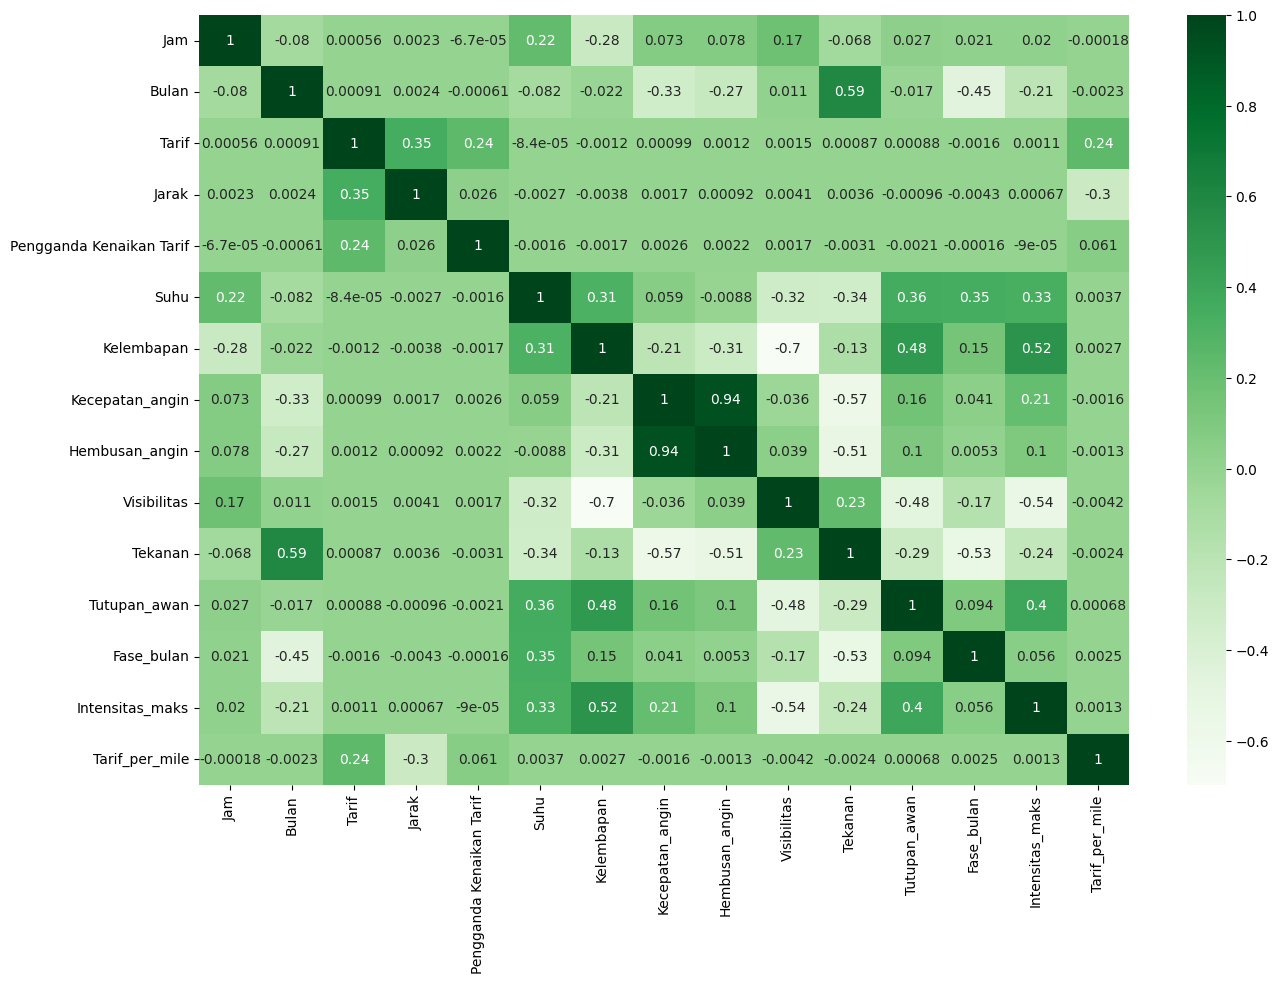

In [77]:
# annot=True digunakan untuk menampilkan nilai korelasi pada setiap kotak pada heatmap
plt.figure(figsize=(15, 10))
ax = sns.heatmap(df4.corr(), annot=True, cmap="Greens")

Berdasarkan visualisasi di atas, apabila ada warna kotaknya lebih terang maka korelasinya lebih kuat, sementara warna yang lebih gelap menjunkan korelasi yang lemah. Dapat dilihat bahwa suhu mempunyai hubungan linear positif yang sangat kuat dengan jam jika dibandingkan yang lain, karena waktu berbanding lurus dengan suhu.

In [78]:
# Menghitung matriks korelasi antar kolom pada dataframe bankfull
df4.corr()

,Jam,Bulan,Tarif,Jarak,Pengganda Kenaikan Tarif,Suhu,Kelembapan,Kecepatan_angin,Hembusan_angin,Visibilitas,Tekanan,Tutupan_awan,Fase_bulan,Intensitas_maks,Tarif_per_mile
Jam,1.000000,-0.079734,0.000561,0.002283,-0.000067,0.218829,-0.275778,0.073011,0.077646,0.173776,-0.067787,0.026680,0.020997,0.020288,-0.000176
Bulan,-0.079734,1.000000,0.000913,0.002402,-0.000612,-0.082048,-0.022078,-0.334897,-0.270541,0.011129,0.589683,-0.016767,-0.452655,-0.213301,-0.002337
Tarif,0.000561,0.000913,1.000000,0.345061,0.240458,-0.000084,-0.001238,0.000990,0.001218,0.001497,0.000866,0.000883,-0.001602,0.001114,0.237671
Jarak,0.002283,0.002402,0.345061,1.000000,0.025946,-0.002738,-0.003849,0.001709,0.000920,0.004143,0.003565,-0.000958,-0.004301,0.000670,-0.299697
Pengganda Kenaikan Tarif,-0.000067,-0.000612,0.240458,0.025946,1.000000,-0.001594,-0.001677,0.002593,0.002162,0.001716,-0.003109,-0.002101,-0.000163,-0.000090,0.061271
Suhu,0.218829,-0.082048,-0.000084,-0.002738,-0.001594,1.000000,0.313813,0.058846,-0.008775,-0.324158,-0.339378,0.355049,0.345560,0.333160,0.003668
Kelembapan,-0.275778,-0.022078,-0.001238,-0.003849,-0.001677,0.313813,1.000000,-0.207121,-0.306424,-0.697860,-0.134010,0.480196,0.146794,0.519783,0.002738
Kecepatan_angin,0.073011,-0.334897,0.000990,0.001709,0.002593,0.058846,-0.207121,1.000000,0.937649,-0.035550,-0.574573,0.159671,0.041198,0.212359,-0.001607
Hembusan_angin,0.077646,-0.270541,0.001218,0.000920,0.002162,-0.008775,-0.306424,0.937649,1.000000,0.038898,-0.513851,0.104673,0.005271,0.100315,-0.001270
Visibilitas,0.173776,0.011129,0.001497,0.004143,0.001716,-0.324158,-0.697860,-0.035550,0.038898,1.000000,0.227875,-0.477676,-0.173673,-0.544535,-0.004184


In [79]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Jam                       637976 non-null  int64  
 1   Hari                      637976 non-null  object 
 2   Bulan                     637976 non-null  int64  
 3   Tanggal                   637976 non-null  object 
 4   Asal                      637976 non-null  object 
 5   Tujuan                    637976 non-null  object 
 6   Merek                     637976 non-null  object 
 7   Produk                    637976 non-null  object 
 8   Tarif                     637976 non-null  float64
 9   Jarak                     637976 non-null  float64
 10  Pengganda Kenaikan Tarif  637976 non-null  float64
 11  Suhu                      637976 non-null  float64
 12  Cuaca                     637976 non-null  object 
 13  Keterangan                637976 non-null  o

# 6. DATA PREPROCECING

## 6.1 Encoding Data Columns

Dikarenakan banyak tipe data object kita ubah dulu menjadi numerik agar mempermudah nantinya.

In [80]:
produk_encoded = pd.get_dummies(df4['Produk'])
produk_encoded = pd.DataFrame(produk_encoded, columns=produk_encoded.columns)
produk_encoded

,Lyft Lux,Lyft Lux Black,Lyft Lux Black XL,Lyft Regular,Lyft Shared,Lyft XL,Uber Black,Uber Black SUV,Uber WAV,UberPool,UberX,UberXL
0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
693065,0,0,0,0,0,0,0,0,1,0,0,0
693066,0,0,0,0,0,0,0,0,0,0,0,1
693067,0,0,0,0,0,0,0,0,0,0,1,0
693069,0,0,0,0,0,0,0,1,0,0,0,0


Melakukan encoding dengan menggunakan library OneHotEncoder pada kolom produk, lalu dinamai sebagai produk_encoded

In [81]:
#creating labelEncoder

# preprocessing.LabelEncoder() digunakan untuk membuat objek LabelEncoder yang akan digunakan untuk melakukan encoding pada setiap kolom.
label_encoder = preprocessing.LabelEncoder()

# mengambil tipe data object pada dataset dan di simpan di dfbank
df_category = df4.select_dtypes(include=['object'])
df5 = df4.copy()

for column in df_category.columns:
    df5[column] = label_encoder.fit_transform(df4[column])

Melakukan Encoding dengan menggunakan LabelEncoder untuk kolom object yang lain

In [82]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Jam                       637976 non-null  int64  
 1   Hari                      637976 non-null  int64  
 2   Bulan                     637976 non-null  int64  
 3   Tanggal                   637976 non-null  int64  
 4   Asal                      637976 non-null  int64  
 5   Tujuan                    637976 non-null  int64  
 6   Merek                     637976 non-null  int64  
 7   Produk                    637976 non-null  int64  
 8   Tarif                     637976 non-null  float64
 9   Jarak                     637976 non-null  float64
 10  Pengganda Kenaikan Tarif  637976 non-null  float64
 11  Suhu                      637976 non-null  float64
 12  Cuaca                     637976 non-null  int64  
 13  Keterangan                637976 non-null  i

In [83]:
X = df5.drop(['Tarif', 'Tarif_per_mile'], axis=1)
y = df4['Tarif']
print(X.shape)
print(y.shape)

(637976, 22)
(637976,)


## 6.2 Feature Selection

Teknik dalam machine learning untuk memilih subset dari fitur (feature) yang relevan atau penting dalam data training yang akan digunakan untuk membuat model. Tujuannya adalah untuk meningkatkan kinerja model dengan mengurangi dimensi data dan menghilangkan fitur yang tidak signifikan atau redundan. Pada tahap ini membuat feature selection menggunakan library sequantialfeatureselector dengan menggunakan LR. Di sini dilakukan pencarian 10 atribut yang paling berpengaruh dengan metode forward.

In [84]:
sfs = SFS(LinearRegression(),
          # Menentukan jumlah fitur yang akan dipilih dalam proses feature selection.
          k_features=10,
          #  Menentukan arah pemilihan fitur. Jika bernilai True, SFS akan memilih fitur secara bertahap dengan menambah satu fitur pada setiap iterasi. 
          forward=True,
          #  Menentukan apakah proses feature selection dilakukan dengan menggunakan teknik floating atau tidak. Jika bernilai True, proses feature selection akan menggunakan teknik floating yang memungkinkan fitur yang sudah dipilih untuk dihapus kembali jika ditemukan fitur yang lebih baik.
          floating=False,
          # Menentukan metrik evaluasi yang digunakan dalam proses feature selection. Dalam contoh ini, metrik yang digunakan adalah koefisien determinasi (R-squared).
          scoring = 'r2', 
          #  Menentukan jumlah fold dalam proses cross-validation yang digunakan dalam proses feature selection
          # fold = istilah yang digunakan untuk membagi dataset menjadi beberapa bagian atau subset yang saling tidak tumpang tindih (non-overlapping).
          cv = 3)

In [85]:
#Mencari 10 atribut yang paling berpengaruh
sfs.fit(X, y)
sfs.k_feature_names_

('Hari',
 'Bulan',
 'Tanggal',
 'Asal',
 'Tujuan',
 'Merek',
 'Produk',
 'Jarak',
 'Pengganda Kenaikan Tarif',
 'Rute')

Feature selection menggunakan library F regression dengan k=10. Fungsi ini berguna untuk melakukan feature selection dengan memilih fitur-fitur yang paling relevan untuk memprediksi variabel target. Semakin tinggi skor F suatu fitur, semakin besar kemungkinan fitur tersebut relevan dengan variabel target. Sedangkan semakin kecil p-value suatu fitur, semakin besar kemungkinan fitur tersebut signifikan dalam memprediksi variabel target.

In [86]:
from sklearn.feature_selection import f_regression

# score_func=f_regression menunjukkan bahwa fungsi evaluasi yang digunakan adalah f_regression, yaitu suatu fungsi yang digunakan untuk melakukan feature selection pada masalah regresi. k=10 menunjukkan bahwa 10 fitur terbaik akan dipilih
bestfeatures = SelectKBest(score_func=f_regression, k=10)

# Melakukan fitting atau training pada model bestfeatures dengan menggunakan data X_transform sebagai fitur dan y sebagai target.
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

print("10 Atribut Terbaik")
print(featureScores.nlargest(10,'Score'))

10 Atribut Terbaik
                       Specs         Score
8                      Jarak  86228.749811
7                     Produk  61466.664037
9   Pengganda Kenaikan Tarif  39151.469570
6                      Merek   4466.959446
21                      Rute    406.066926
4                       Asal    329.793870
5                     Tujuan    253.258534
1                       Hari      3.452603
19                Fase_bulan      1.637163
16               Visibilitas      1.428760


10 atribut yang paling berpengaruh signifikan berdasarkan kedua uji feature selsction yang telah dilakukan adalah atribut jarak, produk, pengganda kenaikan tarif, merek, rute, asal, tujuan, hari, fase_bulan, visibilitas.

Setelah diperoleh feature yang paling berpengaruh pada model, dilakukan inisiasi final pada variabel X yang akan dijadikan training. Dalam hal ini dipilih atribut yang paling berpengaruh signifikan berdasarkan kedua uji feature selection yang telah dilakukan yaitu jarak, pengganda kenaikan tarif, merek, tujuan, asal, visabilitas, dan masing masing produk dari setiap merek yang ada pada dataframe produk_encoded.

In [87]:
X_fit = pd.concat([df5[['Jarak', 'Pengganda Kenaikan Tarif', 'Merek', 'Tujuan', 'Asal', 'Visibilitas']], produk_encoded],axis=1)

In [88]:
X_fit

,Jarak,Pengganda Kenaikan Tarif,Merek,Tujuan,Asal,Visibilitas,Lyft Lux,Lyft Lux Black,Lyft Lux Black XL,Lyft Regular,Lyft Shared,Lyft XL,Uber Black,Uber Black SUV,Uber WAV,UberPool,UberX,UberXL
0,0.44,1.0,0,8,5,10.000,0,0,0,0,1,0,0,0,0,0,0,0
1,0.44,1.0,0,8,5,4.786,1,0,0,0,0,0,0,0,0,0,0,0
2,0.44,1.0,0,8,5,10.000,0,0,0,1,0,0,0,0,0,0,0,0
3,0.44,1.0,0,8,5,10.000,0,0,1,0,0,0,0,0,0,0,0,0
4,0.44,1.0,0,8,5,10.000,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,1.00,1.0,1,6,11,9.785,0,0,0,0,0,0,0,0,1,0,0,0
693066,1.00,1.0,1,6,11,9.785,0,0,0,0,0,0,0,0,0,0,0,1
693067,1.00,1.0,1,6,11,9.785,0,0,0,0,0,0,0,0,0,0,1,0
693069,1.00,1.0,1,6,11,9.785,0,0,0,0,0,0,0,1,0,0,0,0


In [89]:
X_fit.shape

(637976, 18)

Setelah diperoleh atribut yang akan dilakukan training, kemudian membagi data menjadi Training dan Testing dengan proporsi 0.7 dan 0.3

In [90]:
# test_size = 0.30 artinya data testing 30% dan data training 70%
# random_state = 1 digunakan untuk menspesifikasikan random seed pada saat pembagian data training dan data testing

X_train, X_test, y_train, y_test = train_test_split(X_fit, y, test_size = 0.3, random_state = 1)

In [91]:
# Mengetahui dimensi data train dan data test
print('Dimensi feature data train :', X_train.shape)
print('Dimensi target data train :', y_train.shape)
print('Dimensi feature data test :', X_test.shape)
print('Dimensi target data test :', y_test.shape)

Dimensi feature data train : (446583, 18)
Dimensi target data train : (446583,)
Dimensi feature data test : (191393, 18)
Dimensi target data test : (191393,)


# 7. MODEL DEFINING

Pada dataset yang telah diberikan, diketahui bahwa golongan data prediksi termasuk pada golongan data yang kontinu. Akibatnya pada dataset yang telah diberikan, metode pengujian pada training setnya akan menggunakan metode regresi linier dengan pembanding random forest regressor. <br> <br>
Selanjutnya akan didefinisikan model-model yang digunakan pada pengujian dataset ini. <br> <br>
Model pertama yakni model regresi linier dengan menghilangkan nilai intercept, dilambangkan dengan variabel 'lr_i'. Alasan penghilangan intersep dikarenakan tarif bukan merupakan variabel yang independen, sehingga akan ada suatu garis yang membawanya menuju nilai 0. <br>
Model kedua yakni model regresi linier dengan melakukan normalisasi data menggunakan mean, dilambangkan dengan variabel 'lr_m'. Hal ini dikarenakan atribut yang digunakan memiliki variansi nilai yang beragam. <br>
Model ketiga yakni model Random Forest Regressor, dilambangkan dengan variabel 'rfr'. Model ini digunakan sebagai pembanding dari model-model Regresi linier. Parameter yang digunakan yakni n estimator sejumlah 56, dikarenakan dataset ini memiliki baris yang sangat banyak sehingga cabang tree yang digunakan dapat diperkecil.

In [92]:
lr_i = LinearRegression(fit_intercept=False)
lr_m = make_pipeline(StandardScaler(with_mean=True), LinearRegression())
rfr = RandomForestRegressor(n_estimators = 56, random_state = 14)

# 8. MODEL TRAINING

In [93]:
lm_1 = lr_i.fit(X_train, y_train)
lm_2 = lr_m.fit(X_train, y_train)
rfr_model = rfr.fit(X_train, y_train)

# 9. MODEL EVALUATION

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih

Linear Regression train R Squared  =  0.9273087088331263
Linear Regression test R Squared   =  0.9272034996713253
Linear Regression test RMSE        =  2.5090934706977843


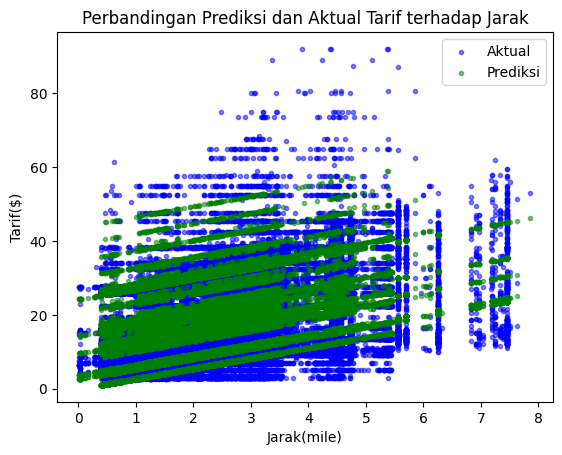

In [94]:
y_pred = lm_1.predict(X_test)

## R-squared data train
lr_train_r2 = lr_i.score(X_train,y_train)
## R-squared data test
lr_test_r2 = lr_i.score(X_test, y_test)

print('Linear Regression train R Squared  = ', lr_train_r2)
print('Linear Regression test R Squared   = ', lr_test_r2)

## Root mean squared error
lr_rmse = np.sqrt(mean_squared_error(y_pred,y_test))
print('Linear Regression test RMSE        = ', lr_rmse)

x_axis = X_test.Jarak 

## Scatter plot
plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Aktual')
plt.scatter(x_axis, y_pred, c = 'g', alpha = 0.5, marker = '.', label = 'Prediksi')
plt.xlabel('Jarak(mile)')
plt.ylabel('Tarif($)') 
plt.title("Perbandingan Prediksi dan Aktual Tarif terhadap Jarak")
plt.legend(loc = 'upper right')
plt.show()

Linear Regression train R Squared  =  0.9271925267083968
Linear Regression test R Squared   =  0.9271032780952154
Linear Regression test RMSE        =  2.5108200565246275


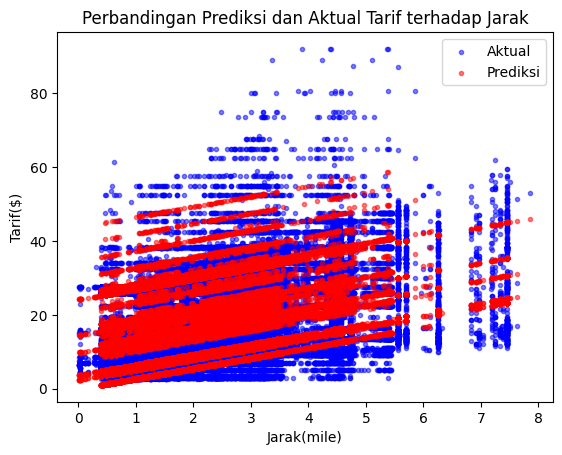

In [95]:
y_pred = lm_2.predict(X_test)

## R-squared data train
lr_train2_r2 = lr_m.score(X_train,y_train)
## R-squared data test
lr_test2_r2 = lr_m.score(X_test, y_test)

print('Linear Regression train R Squared  = ', lr_train2_r2)
print('Linear Regression test R Squared   = ', lr_test2_r2)

## Root mean squared error
lr_rmse2 = np.sqrt(mean_squared_error(y_pred,y_test))
print('Linear Regression test RMSE        = ', lr_rmse2)

x_axis = X_test.Jarak 

## Scatter plot
plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Aktual')
plt.scatter(x_axis, y_pred, c = 'r', alpha = 0.5, marker = '.', label = 'Prediksi')
plt.xlabel('Jarak(mile)')
plt.ylabel('Tarif($)') 
plt.title("Perbandingan Prediksi dan Aktual Tarif terhadap Jarak")
plt.legend(loc = 'upper right')
plt.show()

Random Forest train R Squared  = 0.986
Random Forest test R Squared   = 0.963
Random Forest test RMSE        = 1.798


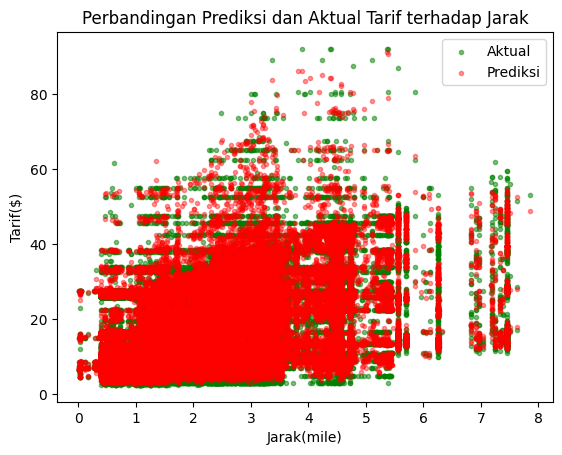

In [96]:
y_pred = rfr.predict(X_test)
## R-squared data train
rf_train_r2 = rfr_model.score(X_train,y_train)
## R-squared data test
rf_test_r2 = rfr_model.score(X_test, y_test)

print('Random Forest train R Squared  = %.3f' % rf_train_r2)
print('Random Forest test R Squared   = %.3f' % rf_test_r2)

## Root mean squared error
rf_rmse = np.sqrt(mean_squared_error(y_pred,y_test))
print('Random Forest test RMSE        = %.3f' % rf_rmse)

x_axis = X_test.Jarak 

## Scatter plot
plt.scatter(x_axis, y_test, c = 'g', alpha = 0.5, marker = '.', label = 'Aktual')
plt.scatter(x_axis, y_pred, c = 'r', alpha = 0.4, marker = '.', label = 'Prediksi')
plt.xlabel('Jarak(mile)')
plt.ylabel('Tarif($)') 
plt.title("Perbandingan Prediksi dan Aktual Tarif terhadap Jarak")
plt.legend(loc = 'upper right')
plt.show()

Berdasarkan nilai evaluasi di atas, Kedua model memiliki nilai R Squared yang cukup tinggi dan hampir sama, yaitu sekitar 0.927, yang menunjukkan model cukup baik dalam menjelaskan variabilitas data. Namun, nilai RMSE pada kedua model juga hampir sama besar, yaitu sekitar 2.509, yang menunjukkan bahwa model masih memiliki error dalam memprediksi harga. 

Namun jika dilihat lagi, nilai RMSE pada model 2 cenderung lebih tinggi sedikit dari pada model 1.

Model ketiga yaitu Random Forest hanya digunakan sebagai pembanding antara 2 evaluasi model pertama,model ini memiliki evaluasi model paling baik diantara ketiga model dikarenakan memiliki nilai RMSE yang rendah dam hasil train dan test R squared yang lebih tinggi juga

# 10. MODEL INFERENCE

Model yang sudah kita latih akan dicoba pada data selain data yang sudah tersedia. Data yang dimaksud bisa berupa data buatan oleh student, ataupun data yang ada pada internet

In [97]:
X_fit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Jarak                     637976 non-null  float64
 1   Pengganda Kenaikan Tarif  637976 non-null  float64
 2   Merek                     637976 non-null  int64  
 3   Tujuan                    637976 non-null  int64  
 4   Asal                      637976 non-null  int64  
 5   Visibilitas               637976 non-null  float64
 6   Lyft Lux                  637976 non-null  uint8  
 7   Lyft Lux Black            637976 non-null  uint8  
 8   Lyft Lux Black XL         637976 non-null  uint8  
 9   Lyft Regular              637976 non-null  uint8  
 10  Lyft Shared               637976 non-null  uint8  
 11  Lyft XL                   637976 non-null  uint8  
 12  Uber Black                637976 non-null  uint8  
 13  Uber Black SUV            637976 non-null  u

In [98]:
## Membuat variable data untuk mengisi data baru 
data = {
    'Jarak': [3.6, 2.7, 8.9, 5.1, 6.2],
    'Pengganda Kenaikan Tarif': [1.5, 1.1, 1.8, 1.2, 1.4],
    'Merek': [0, 1, 1, 0, 0],
    'Tujuan': [0, 3, 5, 4, 8],
    'Asal': [1, 0, 1, 0, 0],
    'Visibilitas': [7.8, 6.4, 9.3, 8.1, 5.5],
    'Lyft Lux': [0, 0, 0, 1, 0],
    'Lyft Lux Black': [1, 0, 0, 0, 0],
    'Lyft Lux Black XL': [0, 1, 0, 0, 1],
    'Lyft Regular': [0, 0, 1, 0, 0],
    'Lyft Shared': [0, 0, 0, 0, 0],
    'Lyft XL': [1, 0, 0, 0, 0],
    'Uber Black': [0, 1, 0, 0, 0],
    'Uber Black SUV': [0, 0, 0, 0, 1],
    'Uber WAV': [0, 0, 0, 0, 0],
    'UberPool': [0, 0, 0, 1, 0],
    'UberX': [1, 0, 0, 0, 0],
    'UberXL': [0, 0, 1, 0, 0]
}
## Membuat dataframe dari variable 'data' dengan nama X_new
X_new = pd.DataFrame(data)

Membuat Dataframe baru yang berisi data baru. Kolom yang digunakan adalah yang terdapat pada X_fit, yaitu data yang memiliki pengaruh lebih tinggi terhadap tarif 

In [99]:
X_new

,Jarak,Pengganda Kenaikan Tarif,Merek,Tujuan,Asal,Visibilitas,Lyft Lux,Lyft Lux Black,Lyft Lux Black XL,Lyft Regular,Lyft Shared,Lyft XL,Uber Black,Uber Black SUV,Uber WAV,UberPool,UberX,UberXL
0,3.6,1.5,0,0,1,7.8,0,1,0,0,0,1,0,0,0,0,1,0
1,2.7,1.1,1,3,0,6.4,0,0,1,0,0,0,1,0,0,0,0,0
2,8.9,1.8,1,5,1,9.3,0,0,0,1,0,0,0,0,0,0,0,1
3,5.1,1.2,0,4,0,8.1,1,0,0,0,0,0,0,0,0,1,0,0
4,6.2,1.4,0,8,0,5.5,0,0,1,0,0,0,0,1,0,0,0,0


In [100]:
y_pred_new = lm_1.predict(X_new)
print('Hasil prediksi tarif baru :', y_pred_new)

Hasil prediksi tarif baru : [18.53588189 31.16692698 33.69664431 20.67853129 63.50393499]


Untuk memprediksi tarif baru, digunakan model 1 yang memiliki nilai RMSE lebih rendah daripada model 2

Setiap nilai hasil prediksi merupakan nilai dari setiap pengamatan yang dilakukan (pengamatan dilakukan berdasarkan data per baris)

# 11. KESIMPULAN

Berdasarkan hasil analisis dapat disimpulkan bahwa:
- Saat dilakukan perbandingan transportasi Uber dan Lyft, Uber lebih unggul dari pada Lyft yaitu Uber sebesar 55.8% sedangkan 48.2% merk Lyft.
- Berdasarkan visualisasi menggunakan heatmap plot dapat dilihat bahwa suhu mempunyai hubungan linear positif yang sangat kuat dengan jam jika dibandingkan yang lain, karena waktu berbanding lurus dengan suhu.
- Pengguna memesan transportasi lyft terbanyak pada hari Senin, kemungkinan terjadi karena hari Senin adalah hari pertama sehabis akhir minggu, maka orang-orang sering bagun terlambat dan memilih untuk memesan Lyft. Sedangkan paling sedikit adalah hari kamis.
- Rute Distrik Keuangan-Universitas Boston merupakan rute dengan total tarif tertinggi yaitu sebesar USD 227956.0

- Tujuan yang paling sering dikunjungi adalah Distrik Keuangan.
- 7 atribut yang paling berpengaruh signifikan berdasarkan kedua uji feature selsction yang telah dilakukan adalah :
1. Jarak, jarak dapat mempengaruhi biaya transportasi dan waktu tempuh. Oleh karena itu, atribut jarak dapat menjadi faktor penting dalam memprediksi harga atau waktu tempuh perjalanan.
2. Produk, produk berkaitan dengan jenis layanan yang diberikan oleh Uber atau Lyft, misalnya jenis kendaraan atau layanan khusus tertentu. Oleh karena itu, atribut produk dapat menjadi faktor penting dalam memprediksi preferensi pelanggan terhadap jenis layanan yang ditawarkan.
3. Pengganda kenaikan tarif, memiliki pengaruh yang signifikan karena kenaikan tarif biasanya terjadi pada waktu-waktu tertentu seperti jam sibuk atau hari libur. Oleh karena itu, atribut pengganda kenaikan tarif dapat menjadi faktor penting dalam memprediksi tingkat permintaan dan harga pada waktu-waktu tertentu.
4. Merek, berkaitan dengan citra merek dan preferensi pelanggan terhadap merek tertentu. Oleh karena itu, atribut merek dapat menjadi faktor penting dalam memprediksi preferensi pelanggan terhadap Uber atau Lyft.
5. Asal, asal berkaitan dengan jarak, waktu tempuh, dan preferensi pelanggan terhadap rute tertentu. Oleh karena itu, atribut asal dapat menjadi faktor penting dalam memprediksi permintaan dan waktu tempuh pada rute tertentu.
6. Tujuan, tujuan berkaitan dengan jarak, waktu tempuh, dan preferensi pelanggan terhadap rute tertentu. Oleh karena itu, atribut tujuan dapat menjadi faktor penting dalam memprediksi permintaan dan waktu tempuh pada rute tertentu.
7.  Visibilitas, berkaitan dengan kondisi cuaca dan kondisi lalu lintas, yang dapat mempengaruhi waktu tempuh dan preferensi pelanggan terhadap layanan. Oleh karena itu, atribut visibilitas dapat menjadi faktor penting dalam memprediksi waktu tempuh dan preferensi pelanggan.
- Berdasarkan nilai evaluasi di atas, Kedua model memiliki nilai R Squared yang cukup tinggi dan hampir sama, yaitu sekitar 0.927, yang menunjukkan model cukup baik dalam menjelaskan variabilitas data. Namun, nilai RMSE pada kedua model juga hampir sama besar, yaitu sekitar 2.509, yang menunjukkan bahwa model masih memiliki error dalam memprediksi harga. Namun jika dilihat lagi, nilai RMSE pada model 2 cenderung lebih tinggi sedikit dari pada model 1.
- Untuk memprediksi tarif baru, digunakan model 1 yang menggunakan data dengan menghilangkan nilai intercept yang mana memiliki nilai RMSE lebih rendah daripada model 2. 
- Hasil prediksi tarif baru : 
1. USD 18.53 

2. USD 31.16

3. USD 33.69

4. USD 20.67

5. USD 63.50